In [32]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Exploration et prétraitement des données

In [2]:
# Chargement des données depuis Kaggle
# Assurez-vous d'avoir le fichier CSV téléchargé à l'adresse suivante dataset_url = "https://www.kaggle.com/datasets/hellbuoy/car-price-prediction"
df = pd.read_csv(r"/home/tamsir/Desktop/AI/Module 2/CarPrice_Assignment.csv")

# Aperçu des données
display(df)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


L'objectif du prétraitement et l'exploration est de nettoyer et explorer les données, identifier les variables clefs et visualiser les relations entre les variables. C'est l'étape la plus longue et la plus importante dans tout algorithme. 



## Aperçu du dataset

Question 1 : Combien de lignes et de colonnes contient le dataset ? 


In [3]:

# 1 Nombre de lignes et de colonnes
nombre_lignes, nombre_colonnes = df.shape
print(f"Nombre de lignes: {nombre_lignes}")
print(f"Nombre de colonnes: {nombre_colonnes}")

Nombre de lignes: 205
Nombre de colonnes: 26


Question 2 : Quels sont les types de données des colonnes ?



In [5]:
# Informations générales sur le DataFrame
df.info()

# Afficher les types de données des colonnes
# print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Question 3 : Y a t-il des valeurs manquantes ? 

In [ ]:

# 3 Vérifier les valeurs manquantes par colonne
print(df.isnull().sum())

# print(df.isnull().values.any()) # Cela retournera True si des valeurs manquent, sinon False.

## Statistiques descriptives des variables numériques

Question 4 : quelles sont les statistiques générales des variables numériques ?

In [9]:
# 4 Afficher les statistiques descriptives
display(df.describe())

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Question 5 : quelles est la voiture la plus chère et la moins chère du dataset ? 

In [15]:

# 5 Afficher la voiture la plus chère et la moins chère
df[df["price"] == df["price"].max()] #voiture pus chère



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.8,3.35,8.0,184,4500,14,16,45400.0


In [16]:
df[df["price"] == df["price"].min()] #voiture moins chère

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0


## Analyses des variables catégoriques




Question 6 : combien de marques de voitures différentes sont présentes ?

In [17]:

# 6 Nombre de marques de voitures différentes
nb_marques = df['CarName'].nunique()
print(f"Nombre de marques de voitures différentes : {nb_marques}")


Nombre de marques de voitures différentes : 147


Question 7 : quelles sont les 5 marques de voiture les plus fréquentes ? 

In [18]:
# 7 Afficher les 5 marques de voitures les plus fréquentes
Top_5_marques = df['CarName'].value_counts().head(5)
print("Top 5 des marques les plus fréquentes :\n", Top_5_marques)

Top 5 des marques les plus fréquentes :
 CarName
peugeot 504             6
toyota corolla          6
toyota corona           6
subaru dl               4
mitsubishi outlander    3
Name: count, dtype: int64


## Visualisation

Question 8 : quelle est la distribution du prix des voitures ? 

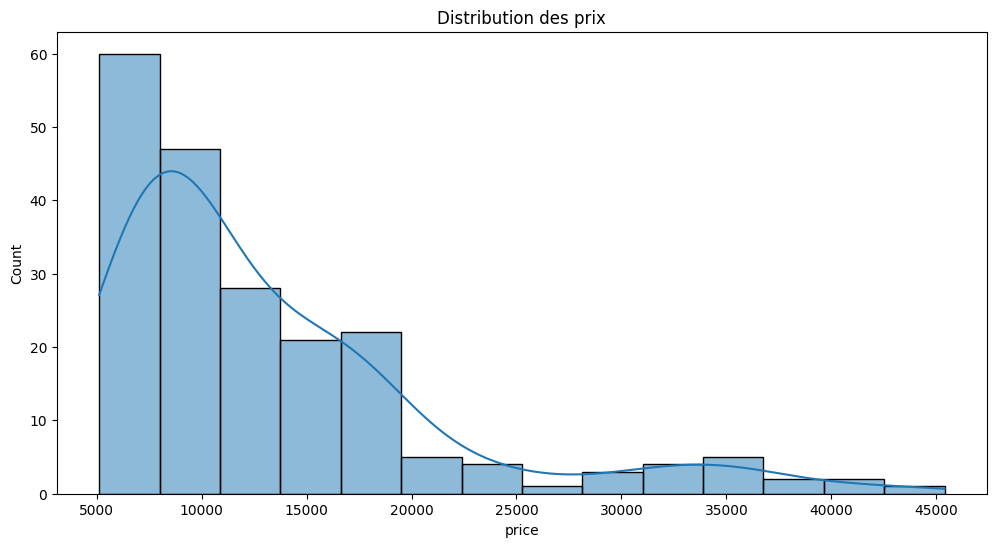

In [19]:
# 8 Afficher la distribution des prix
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution des prix')
plt.show()

Question 9 : quelle est la relation entre la taille du moteur et le prix de vente ? 

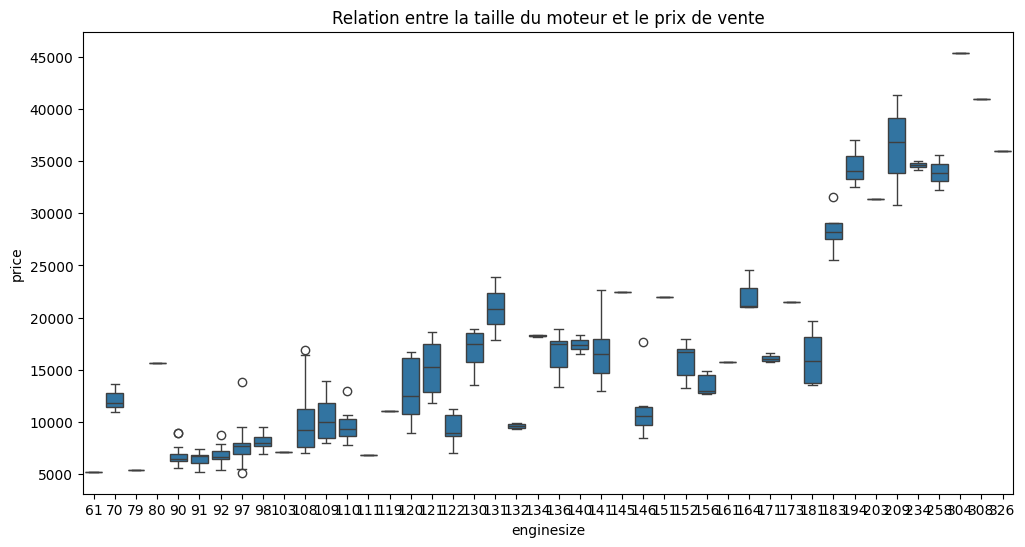

In [ ]:

# 9 La relation entre la taille du moteur et le prix de vente
plt.figure(figsize=(12, 6))
sns.boxplot(x='enginesize', y='price', data=df)

plt.title('Relation entre la taille du moteur et le prix de vente')
plt.show()

Question 10 : quelle est la distribution des types de carburant ? 

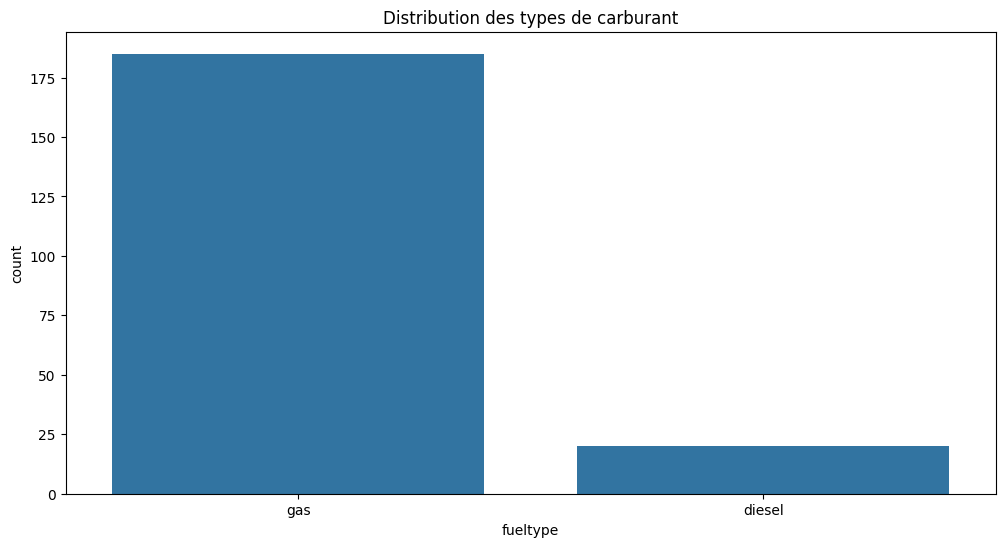

In [22]:
# 10 La distribution des types de carburant 
plt.figure(figsize=(12, 6))
sns.countplot(x='fueltype', data=df)
plt.title('Distribution des types de carburant')
plt.show()

## Corrélations 


Question 11 : quelles sont les variables les plus corrélées avec le prix de vente ? 

In [25]:
# 11 Les variables les plus corrélées avec le prix de vente

# Sélectionner uniquement les colonnes numériques
df_numeriques = df.select_dtypes(include=['number'])

#  Calculer la matrice de corrélation pour les colonnes numériques
corr_matrix = df_numeriques.corr()

#  Extraire la corrélation avec 'price' et trier les résultats
corr_with_price = corr_matrix['price'].sort_values(ascending=False)

# Afficher les variables les plus corrélées avec le prix
print("Variables les plus corrélées avec le prix de vente :")
print(corr_with_price)  # On retire 'price' de la liste

Variables les plus corrélées avec le prix de vente :
price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


Question 12 : visualisez la carte des correlations (heatmap) ? 

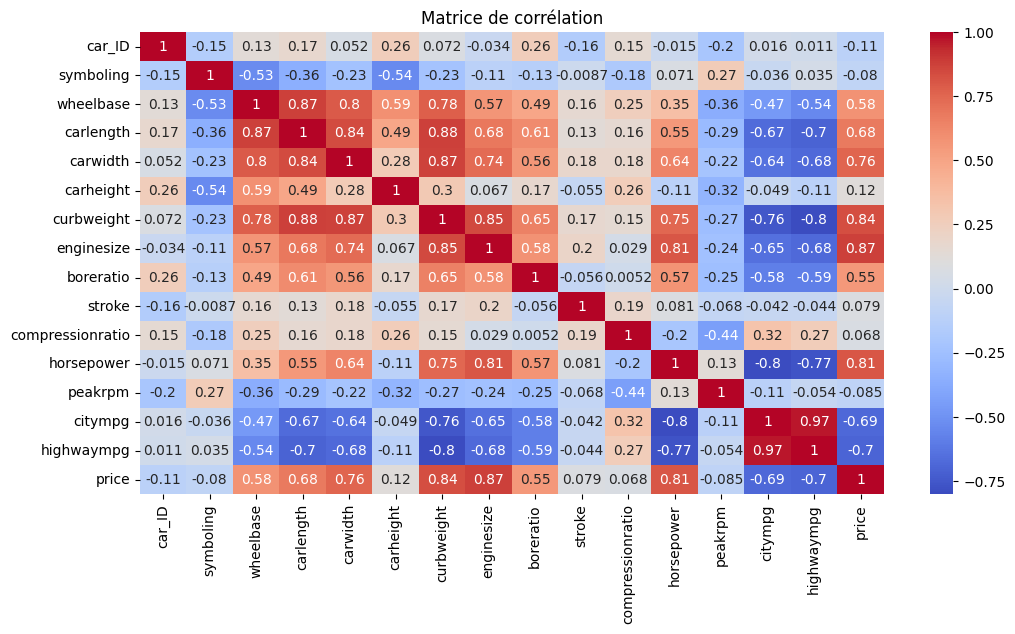

In [26]:
# # 12 visualisez la carte des correlations (heatmap) 
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

Question 13 : comment évolue le prix moyen des voitures en fonction du type de carburant ? (utiliser df.groupby)

In [27]:
# 13 Évolution du prix moyen des voitures en fonction du type de carburant ? (utiliser df.groupby)
prix_moyen_carburant = df.groupby('fueltype')['price'].mean()
print("Prix moyen des voitures en fonction du type de carburant :")
print(prix_moyen_carburant)

Prix moyen des voitures en fonction du type de carburant :
fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64


Question 14 : visualisez le prix d'une voiture en fonction de son kilométrage

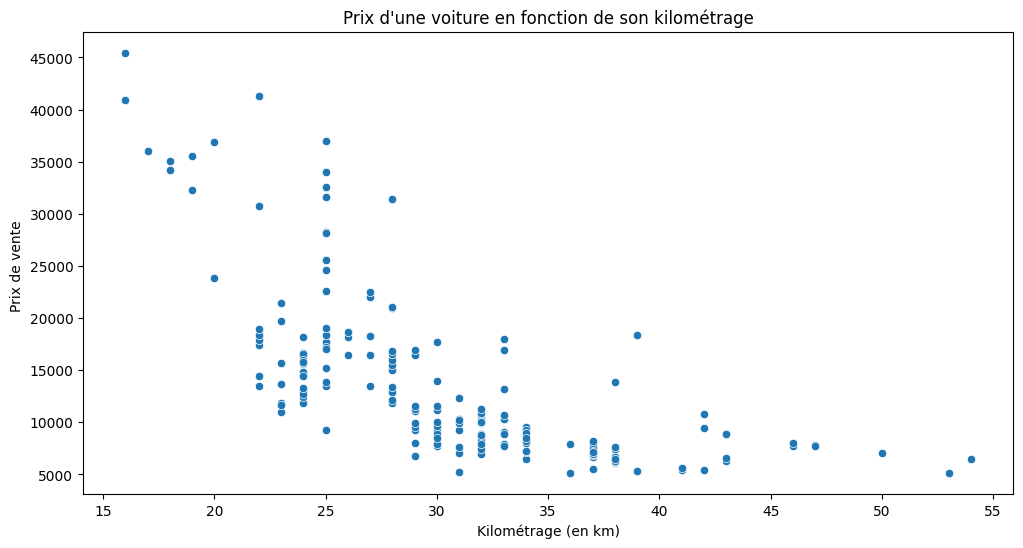

In [30]:
# 14 visualisez le prix d'une voiture en fonction de son kilométrage
plt.figure(figsize=(12, 6))
sns.scatterplot(x='highwaympg', y='price', data=df)
plt.xlabel("Kilométrage (en km)")
plt.ylabel("Prix de vente ")
plt.title('Prix d\'une voiture en fonction de son kilométrage')
plt.show()

# Préparation du dataset

In [36]:
# Séparez les variables explicatives (X) et de la cible (y)
y = df['price']
X =  df.drop(columns=['price'])

# Identification des variables numériques et catégoriques
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Prétraitement des données (Encodage des catégories et standardisation des valeurs numériques)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Transformation des données
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Entrainement et évaluation des trois modèles

In [ ]:
# Régression Linéaire
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("\n=== Régression Linéaire ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.2f}")


=== Régression Linéaire ===
MAE: 7036.82
MSE: 178507381.26
R² Score: -1.26


## Analyse des scores --> Regression Linéaire

- MAE : 7036.82 : Écart moyen assez élevé, suggérant des prédictions imprécises.

- MSE : 178507381.26 : Très élevé, indiquant de grandes erreurs dans certaines prédictions (sensibilité aux outliers ou mauvais ajustement).

- R² : -1.26 : Négatif, ce qui est alarmant. Cela signifie que le modèle est pire que de simplement prédire la moyenne des valeurs cibles (y_test). La régression linéaire ne capture pas du tout la relation entre X_train et y_train.

In [62]:
# Arbre de Décision
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("\n=== Arbre de Décision ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_dt):.2f}")


=== Arbre de Décision ===
MAE: 1983.35
MSE: 10072542.45
R² Score: 0.87


## Analyse des scores --> Arbre de Décision

- MAE : 1983.35 : Bien plus faible que la régression linéaire, donc plus précis.

- MSE : 10072542.45 : Beaucoup plus bas, montrant moins d'erreurs globales.

- R² : 0.87 : Très bon score, le modèle explique 88 % de la variance. Il fonctionne bien sur ces données.

In [63]:
# Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("\n=== Random Forest ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")


=== Random Forest ===
MAE: 1370.74
MSE: 3651111.33
R² Score: 0.95


## Analyse des scores --> Random Forest

- MAE : 1370.74 : Encore meilleur que l'arbre de décision, indiquant une précision accrue.

- MSE : 3651111.33 : Le plus bas des trois, suggérant une réduction significative des erreurs.

- R² : 0.95 : Excellent, expliquant 95 % de la variance. C'est le meilleur modèle ici.

# Comment améliorer la régression linéaire ?

Il existe certaines hypothèses qui garantissent le fonctionnment de la régression linéaire. Ces hypothèses sont: 
- Les relations entre les variables doivent etre linéaires.
- Les variables explicatives doivent etre pertinentes.
- Il ne doit pas y avoir d'outliers majeurs ni de multicolinéarité élevée.

Dans le cas que  nous étudions ici, ces hypthèses ne sont pas exactement respectées. 
- Les relations entre X et y ne sont pas linéaires, ce qui favorise des modèles non linéaires comme l’Arbre de Décision et Random Forest.
- Les variables explicatives sont mal choisies ou mal transformées (peut-être qu’elles ne capturent pas bien la tendance des données).
-  Présence d'outliers qui faussent l'ajustement du modèle.
- Multicolinéarité entre les variables explicatives, ce qui perturbe la régression linéaire.

Pour améliorer la performance de ce modèle, nous pouvons procéder comme suit:
- Tester des transformations (logarithme, racine carrée, normalisation) pour rendre la relation plus linéaire.
- Vérifier et supprimer les valeurs extrêmes qui faussent l’apprentissage.
- Tester Ridge ou Lasso Regression pour réduire l'effet de la multicolinéarité.
- Tester une régression polynomiale (par exemple, en ajoutant des termes quadratiques ou cubiques).

# Conclusion
Ici, la régression linéaire est totalement inadaptée aux données (R² négatif). Il vaut mieux utiliser des modèles non linéaires comme les Arbres de Décision ou Random Forest. Toutefois, si on veut forcer une régression linéaire, il faudra transformer les données et optimiser les features.


